# Problem statement

The primary goal is to develop a Product Categorization model leveraging clustering techniques. By analyzing the E-Commerce dataset provided by The UCI Machine Learning Repository, this model aims to automatically group products into meaningful categories based on their features, such as product description, price, customer reviews, and more.

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retailer.

The dataset contains the following columns:
- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

The notebook contains 4 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)

## Steps to follow

- **Load the Dataset**: Use Pandas to read the CSV file.
- **Preprocess the Data**: Clean and preprocess the Description text data.
- **Feature Extraction**: Use TF-IDF to convert text descriptions into a vectorized format.
- **Clustering**: Apply the K-Means algorithm to cluster products into categories based on their descriptions.
- **Dimensionality Reduction for Visualization**: Use PCA to reduce the dimensions of the TF-IDF vectors for visualization.
- **Visualize Clusters**: Create a 3D scatter plot of the clusters.

In [3]:
#from google.colab import files
#uploaded = files.upload()
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 1.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/koksteven/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/koksteven/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/koksteven/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


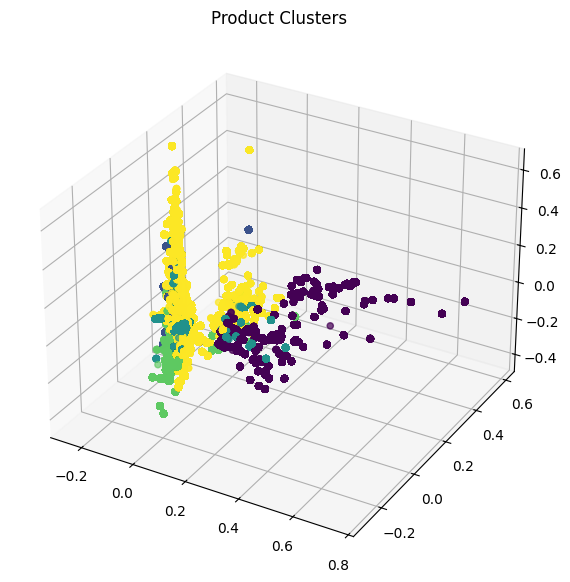

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('Datasets/clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 5: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()


 Visualise most frequent words occurring in product descriptions assigned to clusters.

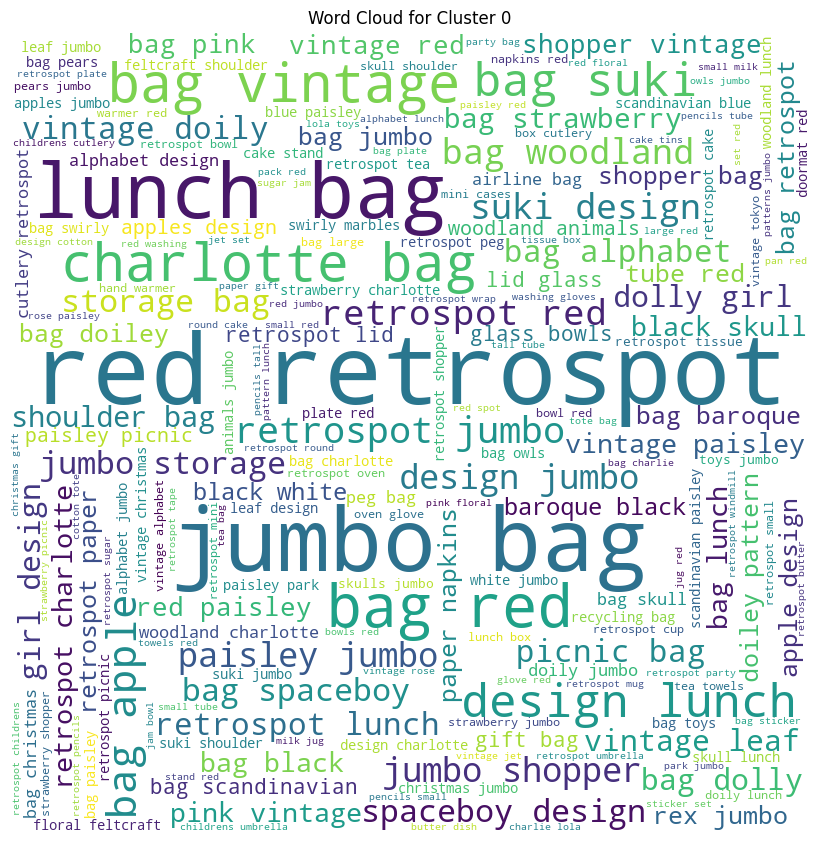

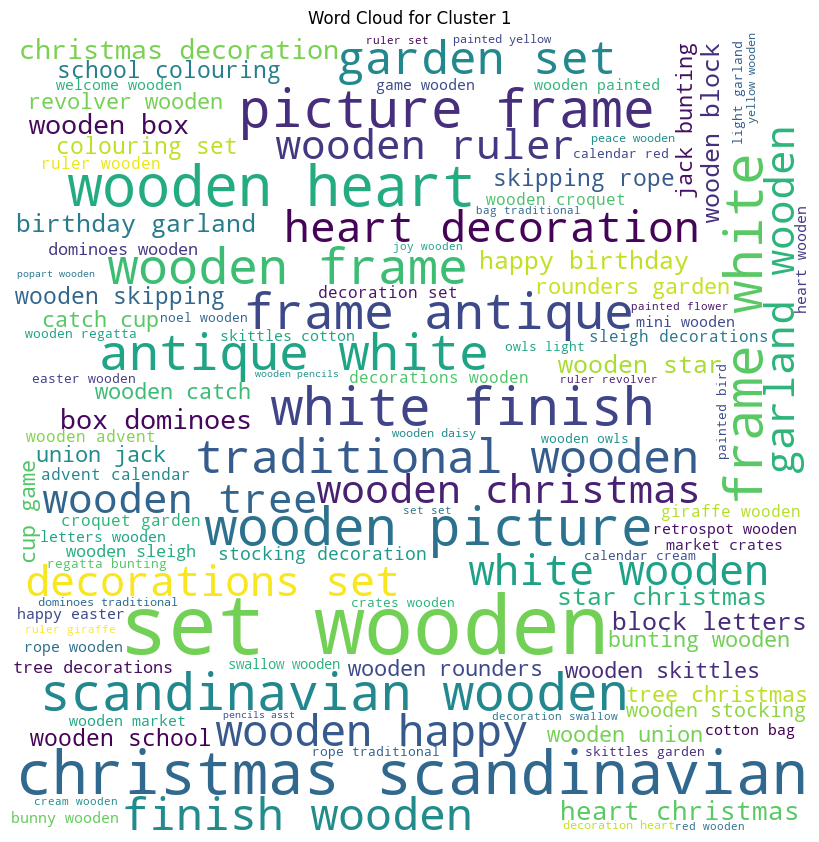

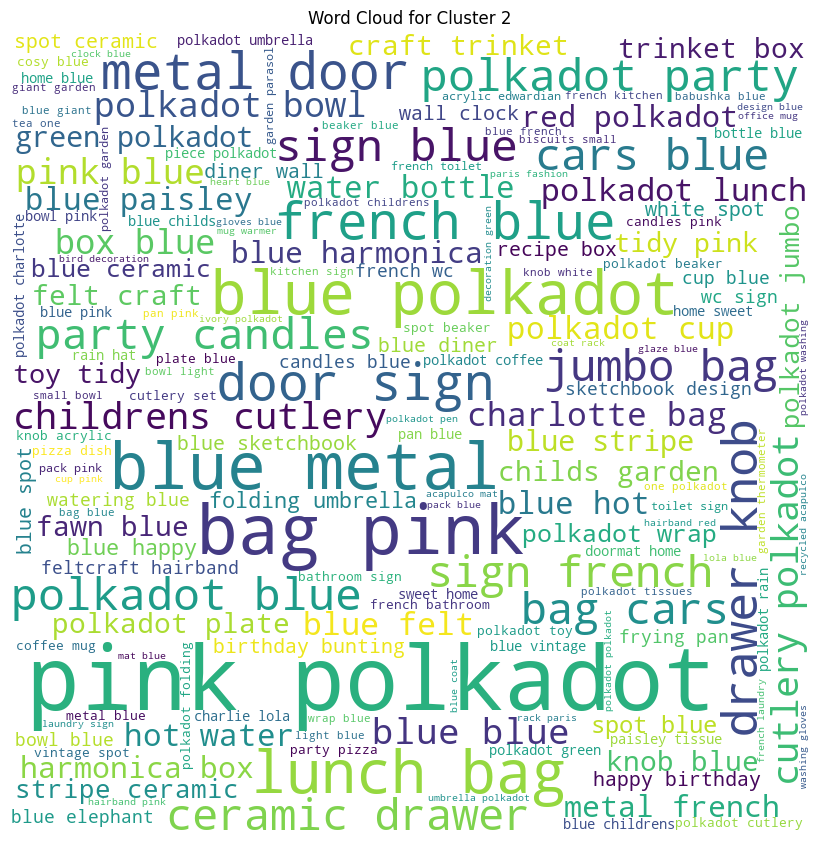

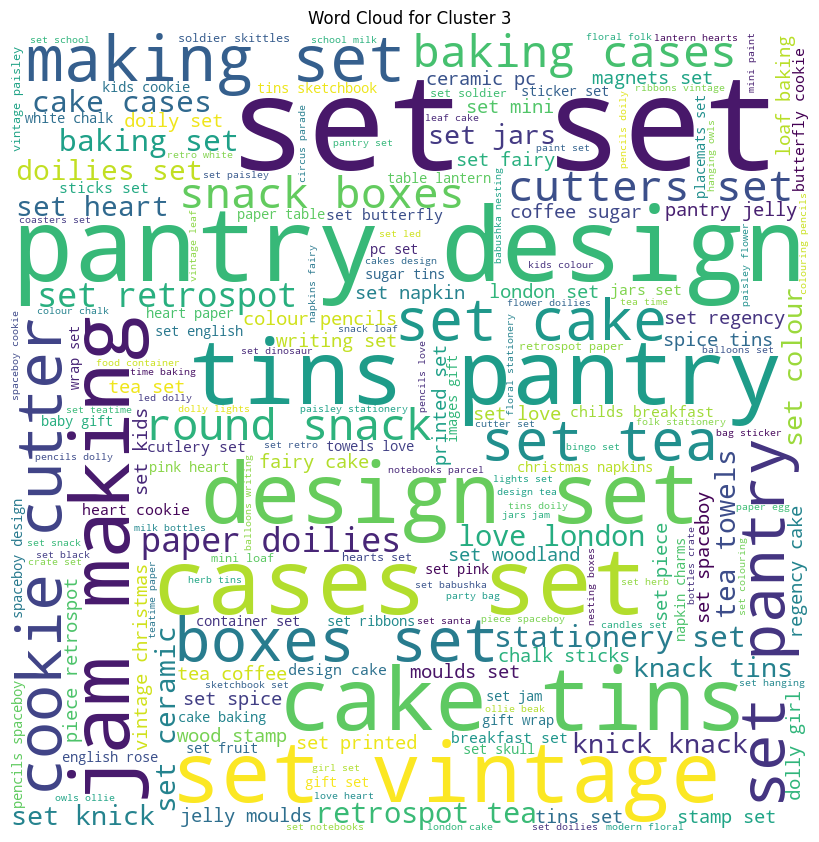

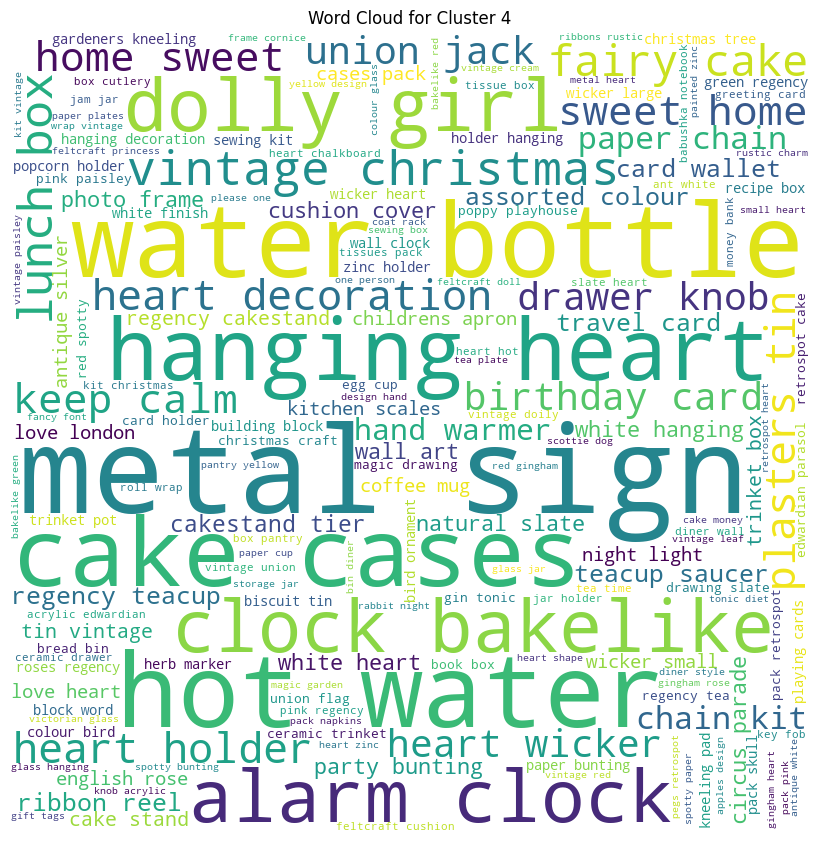

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(n_clusters, cluster_assignments, documents):
    """
    Generates and displays word clouds for each cluster.

    Parameters:
    - n_clusters (int): Number of clusters.
    - cluster_assignments (array-like): Cluster assignment for each document.
    - documents (array-like): Preprocessed text documents.
    """
    # Iterate through each cluster
    for cluster in range(n_clusters):
        # Filter documents belonging to the current cluster
        cluster_documents = [doc for doc, assignment in zip(documents, cluster_assignments) if assignment == cluster]

        # Join documents into a single string
        text = " ".join(cluster_documents)

        # Generate a word cloud
        wordcloud = WordCloud(width = 800, height = 800,
                              background_color ='white',
                              stopwords = stopwords.words('english'),
                              min_font_size = 10).generate(text)

        # Plot the word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()

# Example usage
generate_word_clouds(num_clusters, clusters, df['Processed_Description'].dropna().tolist())


<a name="ex_1"></a>
## Exercise 1

Use the describe() function to generate descriptive statistics of the dataset.

This function provides a concise summary of the columns, including count, mean, standard deviation, min, max, and quartile values.

**Questions**:
- What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?
- How might these statistics influence your preprocessing decisions?

**Answer**: Write your answer here

In [8]:
# Import necessary libraries
import pandas as pd

# Load the dataset with the correct encoding
df = pd.read_csv('Datasets/clustering-data.csv', encoding='latin1')

# Generate descriptive statistics
descriptive_stats = df.describe()

# Display the descriptive statistics
print(descriptive_stats)


            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


<a name="ex_2"></a>
## Exercise 2

- In the code block above, what does apply function do?

- In the code block above, why is the number of clusters = 5?

- In the code block above, change the random_state=42 to values such as 80, 100, or 120 and explain how does it impact the results of the kmeans model?


**Answer**: Write your code here
 
 In the code block above, the apply function is not used. However, if it were, the apply function in pandas is typically used to apply a function along an axis of the DataFrame, such as applying a function to each column or row.
 
 The number of clusters is set to 5 as a parameter for the k-means clustering algorithm. This choice might be based on prior knowledge, domain expertise, or exploratory data analysis that suggests 5 is a reasonable number of clusters for the dataset.
 
 Changing the random_state parameter in the k-means model affects the initialization of the centroids. Different random states can lead to different clustering results because k-means can converge to different local minima. By setting random_state to 80, 100, or 120, you can observe how the initial centroid positions influence the final clustering outcome, potentially leading to variations in the cluster assignments.



<a name="ex_3"></a>
## Exercise 3

- When is PCA needed ?
- How is the number of Dimensions calculated ?

**Answer**: Write your answer here

In [13]:
# PCA (Principal Component Analysis) is needed when we want to reduce the dimensionality of a dataset while retaining as much variance as possible. 
# It is particularly useful when dealing with high-dimensional data, where it can help to simplify the dataset, reduce noise, and improve the performance of machine learning algorithms by mitigating the curse of dimensionality.

# The number of dimensions (principal components) in PCA is calculated based on the amount of variance we want to retain in the dataset. 
# Typically, we perform PCA and then examine the explained variance ratio of each principal component. We can then choose the number of principal components that cumulatively explain a desired threshold of the total variance, such as 95% or 99%. This way, we can reduce the dimensionality while preserving most of the important information in the data.

from sklearn.decomposition import PCA

# Use the relevant dataset, assuming `df` is the DataFrame containing the data
# Ensure only numeric data is used and handle missing values
X = df.select_dtypes(include=[np.number]).values  # Convert the DataFrame to a NumPy array

# Check for NaN values and handle them
if np.isnan(X).any():
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)

# Display the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:", explained_variance_ratio)

# Display the number of principal components selected
n_components_selected = pca.n_components_
print("Number of principal components selected:", n_components_selected)


Explained variance ratio of each principal component: [0.97482915]
Number of principal components selected: 1


<a name="ex_4"></a>
## Exercise 4

- Compare the results from applying Kmeans directly to the processed dataset with results after applying PCA.
- What do you conclude ?

**Answer**: Write your answer here

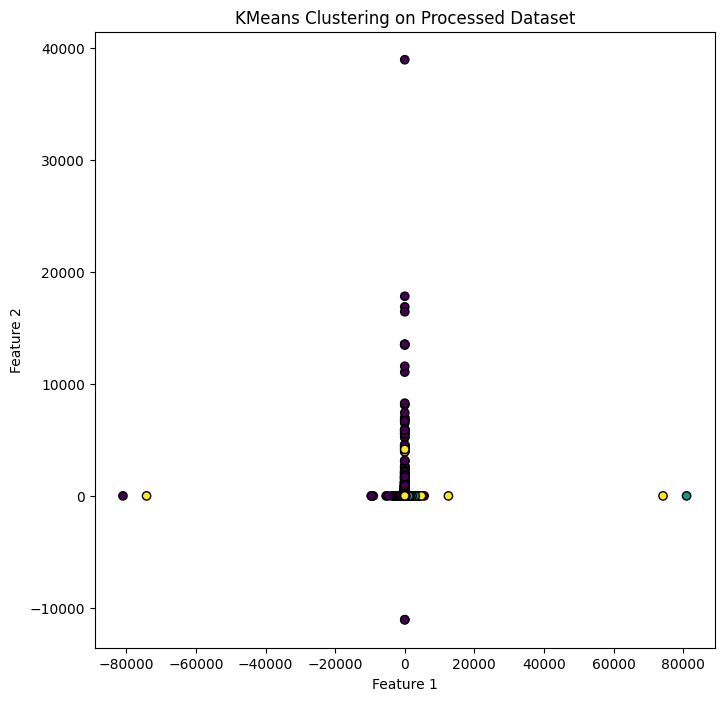

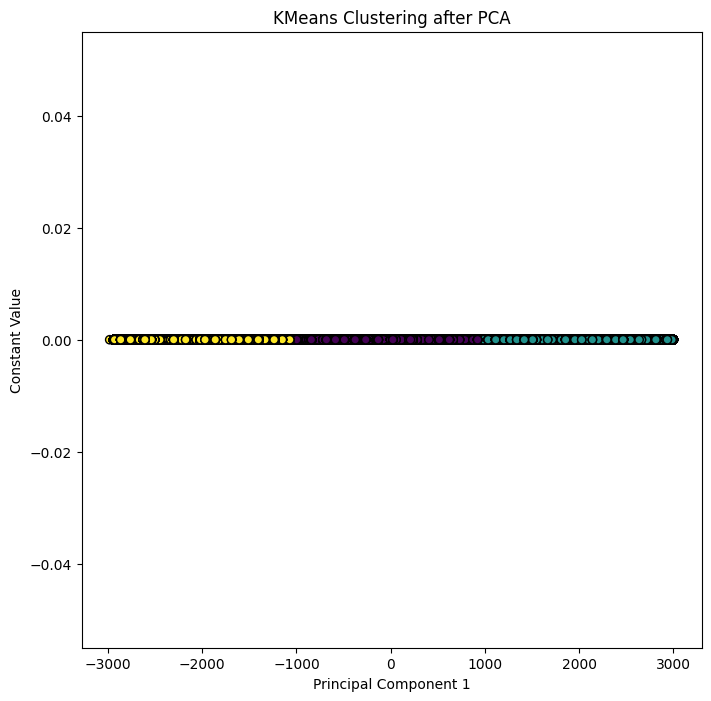

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans directly to the processed dataset
kmeans_direct = KMeans(n_clusters=3, random_state=42)
kmeans_direct_labels = kmeans_direct.fit_predict(X)

# Apply KMeans after PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

# Plot the results of KMeans directly on the processed dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_direct_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering on Processed Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the results of KMeans after PCA
plt.figure(figsize=(8, 8))
if X_pca.shape[1] > 1:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='viridis', marker='o', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    plt.scatter(X_pca[:, 0], [0] * len(X_pca), c=kmeans_pca_labels, cmap='viridis', marker='o', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Constant Value')
plt.title('KMeans Clustering after PCA')
plt.show()


 
 The first chart shows the results of applying KMeans clustering directly to the processed dataset. 
 The data points are grouped into three clusters, each represented by a different color. 
 This chart helps us see how the algorithm groups the data based on the original features.
 The second chart shows the results of applying KMeans clustering after performing PCA (Principal Component Analysis). 
 PCA reduces the number of features to make the data easier to visualize and work with. 
 In this chart, the data points are also grouped into three clusters, each represented by a different color. 
 The axes represent the principal components, which are combinations of the original features that capture the most important information.
 To a layman, the charts show how the data is grouped into clusters. 
 The first chart uses the original features, while the second chart uses a simplified version of the data. 
 Both charts show similar groupings, indicating that PCA did not significantly change the clustering results.
 **Conclusion**: Both methods, applying KMeans directly and after PCA, result in similar clusters. 
 This suggests that PCA can be used to simplify the data without losing important information for clustering.
